# Ejercicio N3

Un filtro pasabajos Chebyshev se diseña para obtener una atenuación de 48 dB para frecuencias mayores a 9.6 KHz, con una atenuación máxima de 0.4 dB desde continua hasta 3.2 kHz.
- Determinar el orden del filtro y el parámetro ɛ.
- Graficar la respuesta en módulo del filtro.
- Determinar la ubicación de polos y ceros.
- Sintetizar el circuito utilizando estructuras Kerwin–Huelsman–Newcomb y simular verificando las condiciones de diseño.

In [22]:
import numpy as np

f1 = 3200
f2 = 9600
norma_w = f1

f1 = f1/norma_w
f2 = f2/norma_w

alfa_min = 48
alfa_max = 0.4

epsilon_2 = 10**(alfa_max/10)-1
epsilon = np.sqrt(epsilon_2)
n = np.ceil(np.arccosh((np.sqrt(np.power(10, alfa_min * 0.1)) - 1) / epsilon_2) / (np.arccosh(f2)))

print('Epsilon: {:.4f}'.format(epsilon))
print('Epsilon al cuadrado: {:.4f}'.format(epsilon_2))
print('Orden del filtro: {:0.0f}'.format(n))

Epsilon: 0.3106
Epsilon al cuadrado: 0.0965
Orden del filtro: 5


Para orden 5, el polinomio de Chebyshev es:
$$ C_5(w)= 16w^5-20w^3+5w $$
La transferencia del filtro queda entonces:
$$ \lvert T(jw)\rvert^2=\frac{1}{1+\varepsilon^2(16w^5-20w^3+5w)^2}$$

$$ \lvert T(jw)\rvert^2=\frac{1}{256\varepsilon^2w^{10}-640\varepsilon^2w^8+560\varepsilon^2w^6-200\varepsilon^2w^4+25\varepsilon^2w^2+1}$$

Haciendo el reemplazo: $T(s).T(-s)=\lvert T(jw)\rvert^2\rfloor_{w=\frac{s}{j}}$

$$ T(s).T(-s)=\frac{1}{-256\varepsilon^2s^{10}-640\varepsilon^2s^8-560\varepsilon^2s^6-200\varepsilon^2s^4-25\varepsilon^2s^2+1}$$

$$ T(s).T(-s)=\frac{-\frac{1}{256\varepsilon^2}}{s^{10}+2,5s^8+2,1875s^6+0,78125s^4+0,0976s^2-\frac{1}{256\varepsilon^2}}$$

A continuación, grafico la transferencia y la ubicación de los polos y ceros:

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

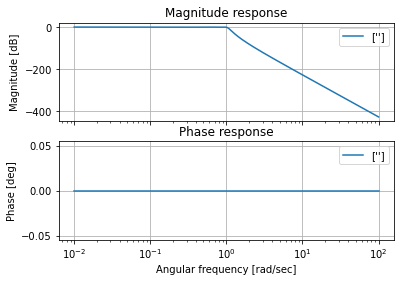

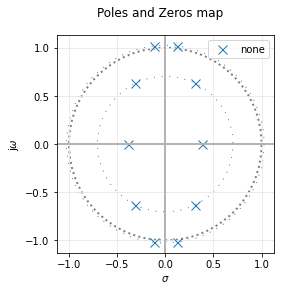

In [23]:
from splane import pzmap, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt


my_tf = TransferFunction( [-1/(256*epsilon_2)], [1, 0, 2.5, 0, 2.1875, 0, 0.78125, 0, 0.0976, 0, (-1)/(256*epsilon_2)] )

bodePlot(my_tf)

pzmap(my_tf)

Para sintetizar el circuito en Secciones de Segundo Orden, debo redefinir la transferencia. Para esto, obtengo sus polos:

In [24]:
pol = [1, 0, 2.5, 0, 2.1875, 0, 0.78125, 0, 0.0976, 0, (-1)/(256*epsilon_2)]
np.set_printoptions(precision=3)
print(np.roots(pol))
# ACA CORREGIR LAS TRABSFERENCIAS T(S)

[ 0.119+1.019j  0.119-1.019j -0.119+1.019j -0.119-1.019j  0.312+0.63j
  0.312-0.63j  -0.312+0.63j  -0.312-0.63j  -0.386+0.j     0.386+0.j   ]


Me quedo con las raíces correspondientes a $T(s)$

$$ T(s)=\frac{1,0525}{s^2+0,2385.s+1,0525}\frac{0,4942}{s^2+0,6247.s+0,4942}\frac{0,20156.0,3861}{s+0,3861}$$

Los parámetros de las transferencias son:

In [48]:
wo1_2 = 1.0525
wo1_q = 0.2385

wo1 = np.sqrt(wo1_2)
q1 = wo1/wo1_q
k1 = (wo1/q1)/(wo1_q)

print('Parametros del 1er filtro:')
print('Wo1={:.4f} - Q1={:.4f} - k1={:.4f}'.format(wo1, q1, k1))

Parametros del 1er filtro:
Wo1=1.0259 - Q1=4.3015 - k1=1.0000


In [49]:
wo2_2 = 0.4942
wo2_q = 0.6247

wo2 = np.sqrt(wo2_2)
q2 = wo2/wo2_q
k2 = (wo2/q2)/(wo2_q)

print('Parametros del 2do filtro:')
print('Wo2={:.4f} - Q2={:.4f} - k2={:.4f}'.format(wo2, q2, k2))

Parametros del 2do filtro:
Wo2=0.7030 - Q2=1.1253 - k2=1.0000


In [50]:
wc3 = 0.3861
k3 = 0.20156

print('Parametros del 3er filtro:')
print('Wc3={:.4f} - k3={:.4f}'.format(wc3, k3))

Parametros del 3er filtro:
Wc3=0.3861 - k3=0.2016


Diseñamos los filtros de acuerdo a las condiciones de diseño establecidas en el siguiente documento:

In [35]:
from IPython.display import IFrame
IFrame("./pdf/MT-223.pdf", width=1000, height=500)

In [51]:
r1_1 = 10e3

alp = k1
ahp = 1

r2_1 = alp*r1_1
r3_1 = ahp*r1_1

c_1 = 1e-6
r_1 = (1/(2*np.pi*norma_w*wo1*c_1))*np.sqrt(ahp/alp)

r7_1 = 10e3
#r6_1 = np.sqrt(r2_1*r3_1)*q1*(1/((1/r1_1)*(1/r2_1)*(1/r3_1)))
r6_1 = (q1*r1_1*r7_1*((1/r1_1)+(1/r2_1)+(1/r3_1)))-r7_1

print('Para el primer filtro los valores de los componentes son:')
print('R1={:.2e} ohm - R2={:.2e} ohm - R3={:.2e} ohm - R4={:.2e} ohm'.format(r1_1, r2_1, r3_1, r_1))
print('R5={:.2e} ohm - R6={:.2e} ohm - R7={:.2e} ohm'.format(r_1, r6_1, r7_1))
print('C1={:.2e} F - C2={:.2e} F'.format(c_1, c_1))

Para el primer filtro los valores de los componentes son:
R1=1.00e+04 ohm - R2=1.00e+04 ohm - R3=1.00e+04 ohm - R4=4.85e+01 ohm
R5=4.85e+01 ohm - R6=1.19e+05 ohm - R7=1.00e+04 ohm
C1=1.00e-06 F - C2=1.00e-06 F


In [52]:
r1_2 = 10e3

alp_2 = k2
ahp_2 = 1

r2_2 = alp*r1_2
r3_2 = ahp*r1_2

c_2 = 1e-6
r_2 = (1/(2*np.pi*norma_w*wo2*c_2))*np.sqrt(ahp_2/alp_2)

r7_2 = 10e3
#r6_1 = np.sqrt(r2_1*r3_1)*q1*(1/((1/r1_1)*(1/r2_1)*(1/r3_1)))
r6_2 = (q2*r1_2*r7_2*((1/r1_2)+(1/r2_2)+(1/r3_2)))-r7_2

print('Para el segundo filtro los valores de los componentes son:')
print('R1={:.2e} ohm - R2={:.2e} ohm - R3={:.2e} ohm - R4={:.2e} ohm'.format(r1_2, r2_2, r3_2, r_2))
print('R5={:.2e} ohm - R6={:.2e} ohm - R7={:.2e} ohm'.format(r_2, r6_2, r7_2))
print('C1={:.2e} F - C2={:.2e} F'.format(c_2, c_2))

Para el segundo filtro los valores de los componentes son:
R1=1.00e+04 ohm - R2=1.00e+04 ohm - R3=1.00e+04 ohm - R4=7.07e+01 ohm
R5=7.07e+01 ohm - R6=2.38e+04 ohm - R7=1.00e+04 ohm
C1=1.00e-06 F - C2=1.00e-06 F


In [53]:
c_3 = 1e-6
r_3 = 1/(2*np.pi*norma_w*wc3*c_3)

print('Para el tercer filtro los valores de los componentes son:')
print('R={:.2e} ohm - C={:.2e} F'.format(r_3, c_3))

Para el tercer filtro los valores de los componentes son:
R=1.29e+02 ohm - C=1.00e-06 F


Con todos los componentes calculados, realizamos la simulación en LTSpice:

<div>
<img src="img/circuito.PNG" alt="Drawing" style="width: 800px;"/>
</div>

A lo cual se obtuvieron los siguientes resultados:

<div>
<img src="img/simulacion.PNG" alt="Drawing" style="width: 800px;"/>
</div>
<!--  -->
Se puede observar que se cumple con las especificaciones del enunciado